<a href="https://colab.research.google.com/github/AlexTako/learning/blob/main/Introduction%20in%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя базу данных фильмов, проверте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

In [ ]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size = 8192):
        f.write(chunk)

In [ ]:
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset
FILE_PATH = './the_movies_dataset'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей

df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['adult'], axis=1)
df = df.drop(['belongs_to_collection'], axis=1)
df = df.drop(['homepage'], axis=1)
df = df.drop(['video'], axis=1)
df = df.drop(['poster_path'], axis=1)
df = df.drop(['production_companies'], axis=1)

<Axes: title={'center': 'Число фильмов по дням недели'}, xlabel='day_of_week', ylabel='count'>

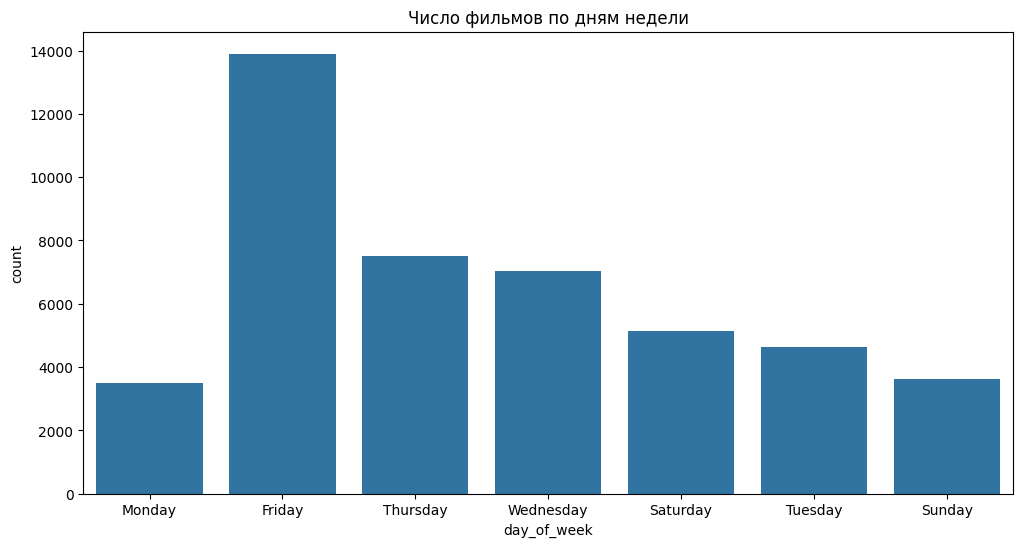

In [ ]:
#Большинство фильмов выпускаются по пятницам

df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce') #преобразование столбца дат из object в формат даты
df['day_of_week'] = df['release_date'].dt.day_name() #добавили столбец с днем недели для каждоый даты

plt.figure(figsize=(12,6))
plt.title("Число фильмов по дням недели")
sns.countplot(x='day_of_week', data=df) # Аналогично barplot - выводит число значений для каждой категории

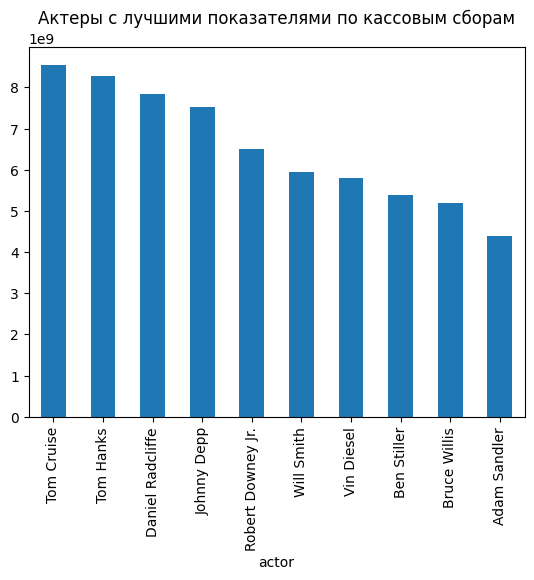

In [ ]:
#Известные актеры снимаются в самых кассовых фильмах
import ast


credits_df = pd.read_csv('./the_movies_dataset/credits.csv')

def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['id'] = df['id'].apply(convert_int) #преобразуем id в int
df = df.drop(df[df['id'].isnull()].index) #удаляем нулевые значения
df['id'] = df['id'].astype('int') #столбец преобразуем в тип int

df_merge = df.merge(credits_df, on='id') #создаем датафрейм с объединенными датафреймами df и credits_df


df_merge['cast'] = df_merge['cast'].apply(ast.literal_eval) #преобразование столбца cast в словарь

def get_actor(x):
    for i in x:
        return i['name']
    return np.nan

df_merge['actor'] = df_merge['cast'].apply(get_actor) #создаем столбец с актерами

plt.title('Актеры с лучшими показателями по кассовым сборам')
df_merge.groupby('actor').sum().sort_values('revenue', ascending=False)['revenue'].head(10).plot(kind='bar')
plt.show()

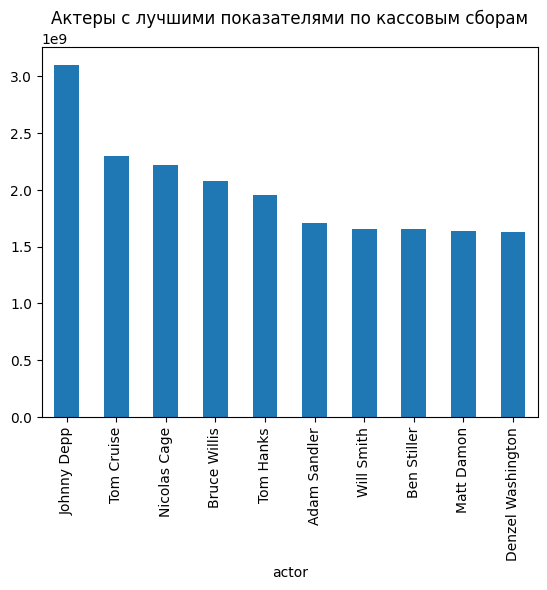

In [ ]:
#Известные актеры снимаются в самыx дорогих фильмах

df_merge['budget'] = pd.to_numeric(df_merge['budget'], errors='coerce') # Преобразуем столбец бюджета в числа принудительно
df_merge['budget'] = df_merge['budget'].replace(0, np.nan) # Заменяем 0 на NaN

plt.title('Актеры с лучшими показателями по кассовым сборам')
df_merge.groupby('actor').sum().sort_values('budget', ascending=False)['budget'].head(10).plot(kind='bar')
plt.show()